# Week 3 - Sampling & Reliability


In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
import numpy as np #For arrays
import scipy as sp #For some stats
import pandas #Gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import seaborn #Makes the graphics look nicer
import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math


#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import os #For looking through files
import os.path #For managing file paths

## <span style="color:red">*Pitch the Domain of your Project*</span>

<span style="color:red">In the two cells immediately following, describe **WHAT** you are planning to analyze for your final project (i.e., texts, contexts and the social game, world and actors you intend to learn about through your analysis) (<200 words) and **WHY** you are going to do it (i.e., why would theory and/or the average person benefit from knowing the results of your investigation) (<200 words)? [**Note**: your individual or collective project can change over the course of the quarter if new data and/or analysis opportunities arise or if old ones fade away.]

## ***What?*** 

My Research Questions:
What's the most frequent concern of personal finance? Is there a heterogeineity among different groups? Does the topics of these concerns change over time?

Corpora:

* Reddit Articles in subreddit [Personal Finance](https://www.reddit.com/r/personalfinance/)


Social Game:

Consumption and investment are two import social indicators in economics. So, I would like to study people's consumption and behavior by their online postings.


Actors:

Most people who post articles on Reddit are young people, many of them are 20-30 (many of them reveal their age in posts) and it's interesting to learn the consumption and investment patterns of these young people.


World:

A large group of anxious young people--we can find students who just got their first job start to consider paying back student loan, buying houses/cars, taking care of aging parents, for the first time in their life. They ask advice from others on online platform to make finance-wise decisions.




## ***Why?***

In the most widely used fomula in Macroeconomics: Y = C + I + G + NX 
(Total economic output = Consumption + Investment + Government spending + Net Export), consuption and investment are individual activities that constitute of our society. 

A [Federal Reserve survey](https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&cad=rja&uact=8&ved=2ahUKEwiB6O2fhs3uAhXQXc0KHbeLAXUQFjAAegQIARAC&url=https%3A%2F%2Fwww.federalreserve.gov%2Fpublications%2Ffiles%2F2017-report-economic-well-being-us-households-201805.pdf&usg=AOvVaw33ULJILWvmE0JU8Dweye4R)  finds almost 40% of American adults wouldn't be able to cover a $400 emergency with cash, savings or a credit-card charge that they could quickly pay off. Why do people in the United States, the most powerful country in the world, face this problem? What's the heaviest financial burden on people? Where is the money going? What are the topics that people who seek financial security talks every day? To answer these questions, we can analyze people's posting online.

**The benefits people can get after they learn the results of my study**

My study will report the most common financial burden on people, and the time trend of the changes most-discussed topics. So people can know what bothers us and if the things that bother us change over time.



## <span style="color:red">*Pitch Your Sample*</span>

<span style="color:red">In the cell immediately following, describe the rationale behind your proposed sample design for your final project. What is the social game, social work, or social actors about whom you are seeking to make inferences? What are its virtues with respect to your research questions? What are its limitations? What are alternatives? What would be a reasonable path to "scale up" your sample for further analysis (i.e., high-profile publication)? (<200 words).

**The rationale behind my proposed sample design**
Collect data from online [financial discussion forums](https://www.doughroller.net/personal-finance/8-awesome-online-forums-personal-finance-investing/): Reddit-Personal Finance, myFICO Forums, YNAB Forums, Morningstar Forums, Reddit–Investing, and Bogleheads Forum. My sample will include the first four datasets.

**Social Game:**
People's income and financial concern.

**Social Actors:**
Online financial websites users: people who post their concern, seek for advice, or share personal experience.

**Its virtues with respect to my research questions:**
People's online discussion is a reflect of their real-life concern

**Limitations:**
Generalization Bias--most users of online platforms are young people who are used to the internet. Middle-age people may not be willing to disclose their financial concerns online.

**Alternatives:**
Other discussion websites.

**Methods to scale up my sample:**
I can boarden my dataset by scale up the time peorid to include more aticles from myFICO Forums, YNAB Forums, Morningstar Forums, Reddit–Investing, Bogleheads Forum, Fat Wallet Forums, and Bigger Pockets Forum.

## <span style="color:red">*Your turn*</span>

<span style="color:red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the MTurk slides in the Assignment link on Canvas, or by hand with friends.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

**Survey Question**: Please annotation for the degree of urgent financial problems for postings from different financial websites

**Answer Scale**: from 1 (not urgent at all) to 5(extremely urgent)

**Number of texts**: 6 pieces of text from 6 different online financial websites: Reddit-PersonalFinance, myFico, YNAB, Morningstar, Reddit–Investing, Bogleheads Forum

**Survey Link**: https://forms.gle/NNGbDSaXgvkaxHJu9

(I used Google Form and my personal network to collect data instead of MTurk--some budget problem...)

**Number of Responses**: 8

In [2]:
x = np.loadtxt("annotation-personalfinance.txt")
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

In [3]:
anno.annotations

array([[4, 0, 3, 0, 1, 2],
       [3, 0, 4, 1, 3, 4],
       [3, 1, 4, 0, 2, 3],
       [4, 2, 4, 0, 2, 3],
       [4, 1, 4, 0, 1, 3],
       [4, 0, 4, 0, 1, 2],
       [3, 0, 3, 0, 1, 3],
       [4, 1, 3, 2, 3, 3]])

In [4]:
anno.labels

[1.0, 2.0, 3.0, 4.0, 5.0]

Because all questions are required in my questionaires. There is no missing value.

In [5]:
anno.missing_values

[]

First, we can look at the label frequencies. Opinions are extreme--the lease people choose to use scale '3'. It's also a little left skewed: more people choose higher urgency level

In [6]:
pyanno.measures.agreement.labels_frequency(anno.annotations,4)

array([0.20833333, 0.16666667, 0.125     , 0.27083333, 0.22916667])

We can compare the responces of the first and the second respondents to see if they are similar:

In [7]:
anno.annotations

array([[4, 0, 3, 0, 1, 2],
       [3, 0, 4, 1, 3, 4],
       [3, 1, 4, 0, 2, 3],
       [4, 2, 4, 0, 2, 3],
       [4, 1, 4, 0, 1, 3],
       [4, 0, 4, 0, 1, 2],
       [3, 0, 3, 0, 1, 3],
       [4, 1, 3, 2, 3, 3]])

In [8]:
anno.annotations[0,:]

array([4, 0, 3, 0, 1, 2])

In [9]:
anno.annotations[5,:]

array([4, 0, 4, 0, 1, 2])

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [2. 1. 0. 0. 0.]
 [2. 2. 1. 0. 0.]]


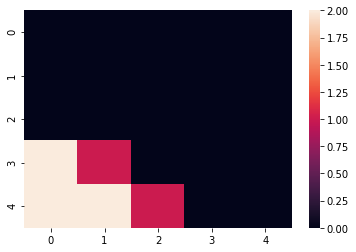

In [10]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],5)
print(c)
ac = seaborn.heatmap(c)
plt.show()

In this map, we can find that these two coders hold relatively different opinions. They got different answers for the same questions. We can also calculate  Scott's $\pi$ of these two coders and  Fleiss' $\kappa$ of all coders.

In [11]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

-0.30612244897959184

In [12]:
fleiss_kappa(anno.annotations[::])

-0.09018743109151048

These numbers are negatives--providing further proof that coders are different. Because our annotations are ordinal, we can calculate Krippendorff's $\alpha$. It's also negative.

In [13]:
krippendorffs_alpha(anno.annotations[::])

-0.10178320977759991

If we take into account the possibility of the agreement occuring by chance, we can calculate Cohen's $\kappa$

In [14]:
krippendorffs_alpha(anno.annotations[::])

-0.10178320977759991

In [15]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[ 1.          0.         -0.06666667  0.          0.03448276 -0.09090909]
 [ 0.          1.          0.         -0.11111111  0.04       -0.03225806]
 [-0.06666667  0.          1.          0.          0.03448276  0.09090909]
 [ 0.         -0.11111111  0.          1.         -0.10344828 -0.03225806]
 [ 0.03448276  0.04        0.03448276 -0.10344828  1.         -0.12      ]
 [-0.09090909 -0.03225806  0.09090909 -0.03225806 -0.12        1.        ]]


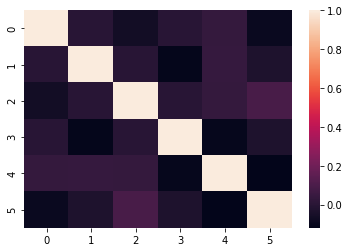

In [16]:
ax = seaborn.heatmap(m)
plt.show()

Because all questions are required, we can see this design is relatively stable.We can also assess the average Cohen's $\kappa$ for all pairs of coders that have coded against one another:

In [17]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

-0.02378511102871503

We can also calculate the weighted $\kappa$ which allows us to count disagreements differently and because my codes are ordered.

In [18]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.0

In [19]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.0066076221148685015

Weighted $\kappa$ tells us that there is no agreement at all!  It says there is no agreement among the raters other than what would be expected by chance. This is hard to believe though... The reason could be that people have really different understanding of online languages.

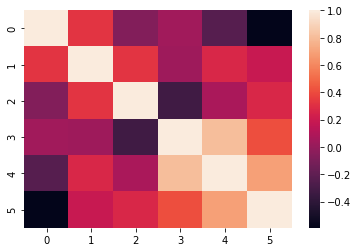

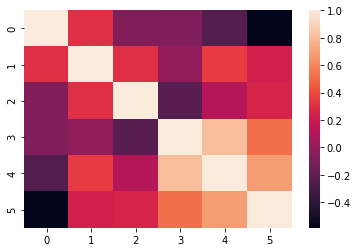

In [20]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

From the correlation of values (Pearson's $\rho$) or correlation of ranks (Spearman's $\rho$) for pairs of coders shown in the two plots above, we found many respondants are different. The averaged Pearson's $\rho$ and Spearman's $\rho$ over all comparable pairs are:

In [21]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.14877887269098622 0.16040438435769933


## <span style="color:red">*Your turn*</span>

<span style="color:red">In the cells immediately following, use the results of your content annotation survey to predict high and low-quality analysts, then predict MAP estimates for your codes in question. What do these estimates suggest about the distribution of skill among your coders? How different are these estimates from a majority vote?

In [22]:
# create a new instance of model B, with 5 label classes and 6 texts to annotate
model = ModelB.create_initial_state(5,6)
# other model parameters are initialized from the model prior
print(model.theta)
print(model.log_likelihood(anno.annotations))

[[[0.74448486 0.07669807 0.07927934 0.09547691 0.00406081]
  [0.4601914  0.45893932 0.03003506 0.03491507 0.01591915]
  [0.06009832 0.03743023 0.69903848 0.17368654 0.02974643]
  [0.01159411 0.05383249 0.19891807 0.41170859 0.32394673]
  [0.00665132 0.00954015 0.12032865 0.35592091 0.50755897]]

 [[0.70590497 0.18506714 0.05099347 0.03160356 0.02643087]
  [0.17340782 0.59566081 0.08047225 0.13315614 0.01730299]
  [0.02758636 0.1183411  0.61683954 0.13792023 0.09931276]
  [0.02160329 0.07004739 0.11620157 0.54687538 0.24527237]
  [0.00313118 0.01557222 0.07635748 0.22334671 0.68159241]]

 [[0.69652968 0.14971611 0.09657884 0.02338085 0.03379451]
  [0.17777055 0.59380521 0.1476282  0.07386297 0.00693308]
  [0.15856097 0.15841471 0.54593869 0.03001528 0.10707036]
  [0.02380394 0.07216773 0.14848181 0.66666063 0.0888859 ]
  [0.0492665  0.09520259 0.08418926 0.20763042 0.56371124]]

 [[0.66674144 0.23097448 0.06610583 0.02446964 0.01170861]
  [0.11263755 0.67132558 0.13880653 0.05111191 0.0

Predict the MAP(maximum a posteriori estimation) estimates:

In [32]:
model.map(anno.annotations)
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.99999998 0.17899795 0.53174212 0.0800374  0.22976611 0.36849441]
-70.86349181510991


Then we can make inferences about the true label classes.
First, calculate the posterior distribution over the true label classes.

In [24]:
posterior = model.infer_labels(anno.annotations)
print(posterior)

[[0.00000000e+00 0.00000000e+00 5.95017305e-34 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.31253817e-34 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.46262979e-34 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.67348617e-33 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.69394468e-35 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.46262979e-34 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 2.65076386e-57 3.96678203e-35 1.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.90642178e-34 1.00000000e+00
  0.00000000e+00]]


Many posterior probabilities are zero--the model think nobody should choose them! And the rate of all questions with highest probabilities are the fourth one. 

We can also look at the means and standard errors of sample.(Btw, is this bootstrap?)

In [25]:
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
print(samples[0].mean(axis=0))
print(samples[0].std(axis=0))

[[[0.66758818 0.16095447 0.0894996  0.03814785 0.0438099 ]
  [0.15183513 0.59339673 0.13646624 0.07822038 0.04008152]
  [0.06799232 0.15256131 0.56693955 0.13707359 0.07543323]
  [0.02805379 0.05736452 0.1169108  0.54835144 0.24931944]
  [0.03967797 0.0453874  0.08222224 0.17307143 0.65964096]]

 [[0.6621256  0.17361479 0.08381444 0.04177202 0.03867315]
  [0.15356761 0.5895982  0.14974253 0.06871278 0.03837889]
  [0.07206598 0.14084539 0.57387658 0.14519048 0.06802157]
  [0.14274587 0.14340218 0.141766   0.45282716 0.11925879]
  [0.04412932 0.04008918 0.08691794 0.15950172 0.66936184]]

 [[0.666802   0.17434872 0.07776589 0.04240454 0.03867885]
  [0.14468349 0.5960282  0.14679738 0.07234433 0.0401466 ]
  [0.07226968 0.13730221 0.57272889 0.14361448 0.07408473]
  [0.03179081 0.05707844 0.11643949 0.53996542 0.25472584]
  [0.04123036 0.04568378 0.0809725  0.16205036 0.67006301]]

 [[0.65639241 0.17108743 0.08447714 0.04471516 0.04332786]
  [0.15384833 0.58831784 0.1466564  0.07659342 0.0

Finally, draw heatmaps to compare the model prediction and actual voter behaviors.

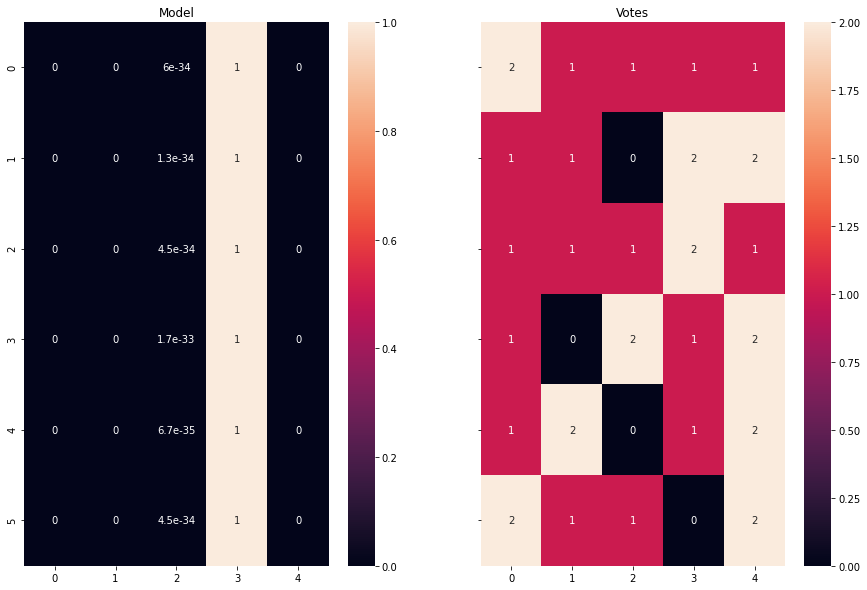

In [26]:
votes = []
for r in anno.annotations:
    v = [0] * len(anno.labels)
    votes.append(v)
    for a in r:
        if a > -1:
            v[a] += 1
votes_array = np.array(votes)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15, 10), sharey=True)
num_questions = 6

seaborn.heatmap(votes_array[:num_questions], annot = True, ax=ax2)
seaborn.heatmap(posterior[:num_questions], annot=True, ax =ax1)
ax1.set_title("Model")
ax2.set_title("Votes")
plt.show()

From the above two graphs, we found that the model predicts for all questions (texts needed to be annotated) is 3. In my scale, this refers to  relatively high anxiety. I think this may results from the number of my questions and participants are small (6 and 8 respectively...) 

Lastly, can also look at ModelBt. To sum up, they are telling the same thing.

In [27]:
# create a new instance of model B, with 5 label classes and 6 texts to annotate
model = ModelBt.create_initial_state(5,6)
# other model parameters are initialized from the model prior
print(model.theta)
print(model.log_likelihood(anno.annotations))

[0.8634146  0.81906861 0.67174439 0.61777856 0.65585897 0.7830246 ]
-99.64697222111573


[[6.67639862e-01 5.69147551e-02 8.21347443e-02 1.38194331e-02
  1.79491205e-01]
 [7.81488644e-02 3.65280807e-02 4.30586292e-03 2.46266673e-01
  6.34750519e-01]
 [4.14380173e-02 1.51942854e-01 4.87482538e-02 6.92566388e-01
  6.53044864e-02]
 [1.58692554e-02 3.21344975e-03 3.38051601e-01 1.04892371e-02
  6.32376456e-01]
 [1.43643873e-02 4.01515599e-01 2.21673205e-03 9.49455160e-03
  5.72408730e-01]
 [2.93129790e-01 2.49886371e-02 3.60615682e-02 7.41235227e-04
  6.45078769e-01]
 [1.15478280e-01 9.84425645e-03 9.84147172e-04 8.72465521e-01
  1.22779576e-03]
 [3.03687686e-03 7.19923386e-02 1.95888458e-02 8.09800792e-01
  9.55811463e-02]]


<function matplotlib.pyplot.show(close=None, block=None)>

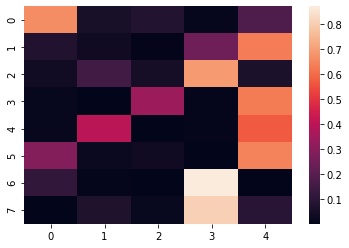

In [28]:
posterior = model.infer_labels(anno.annotations)
print(posterior)
ax = seaborn.heatmap(posterior[:10,])
plt.show

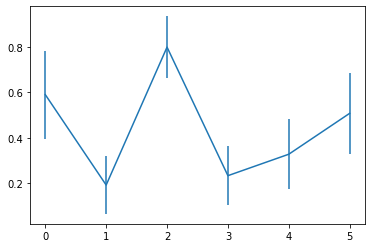

In [31]:
# Visualize the coder accuracy
model = ModelBt.create_initial_state(5, 6)
model.mle(anno.annotations)
samples = model.sample_posterior_over_accuracy(anno.annotations, 200, burn_in_samples=100, thin_samples=3)
y =  samples.mean(axis=0)#.mean(axis = 1).mean(axis = 1)
y_ci = samples.std(axis=0)#.mean(axis = 1).mean(axis = 1)
plt.figure()
plt.errorbar(range(6),y, yerr = y_ci)
plt.show()

In this graph, we can see that for the second people annotate less accurately and third person annotate more accurately.
For other workers, though the capability of coders differs from one to another, there is no significant difference in abbility for other workers except for the second and third one.